In [293]:
# %whos
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [294]:
import pandas as pd
import numpy as np
from numpy import mean
from pylab import rcParams
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from tqdm import tqdm

In [282]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)

In [241]:
data = pd.read_csv('NYCPoverty2017.csv')

In [73]:
messycols = data.columns[data.isna().sum() > 0]

In [74]:
data[messycols].isna().sum()

SCHL              2160
ESR              11880
LANX              3589
ENG              37483
MSP              11096
WKW              31590
JWTR             35190
EducAttain        2160
Off_Threshold        4
dtype: int64

In [242]:
#Replace missing values with 0
data = data.fillna(0)

In [12]:
data['SCHL'].value_counts().sort_index()

0      2160
1      2670
2       986
3       857
4       781
5       848
6       939
7       946
8      1177
9      1520
10     1036
11     1443
12     1627
13     1576
14     1769
15     1817
16    10826
17     2086
18     2262
19     6433
20     3578
21    12399
22     5928
23     1586
24      844
Name: SCHL, dtype: int64

In [ ]:
#newset = newset.drop(['prob_ELL', 'prob_SWD', 'prob_Multi-Racial'], axis=1)

In [243]:
data.columns

Index(['SERIALNO', 'SPORDER', 'PWGTP', 'WGTP', 'AGEP', 'CIT', 'REL', 'SCH',
       'SCHG', 'SCHL', 'SEX', 'ESR', 'LANX', 'ENG', 'MSP', 'MAR', 'WKW',
       'WKHP', 'DIS', 'JWTR', 'NP', 'TEN', 'HHT', 'Boro', 'Povunit_ID',
       'Povunit_Rel', 'HIUnit_ID', 'HIUnit_Head', 'SNAPUnit_ID',
       'SNAPUnit_Rel', 'TaxUnit_ID', 'TaxUnit_Rel', 'TaxUnit_FILER',
       'TaxUnit_FILESTAT', 'TaxUnit_FILETYPE', 'NYCgov_REL', 'NYCgov_SFN',
       'NYCgov_SFR', 'FamType_PU', 'HousingStatus', 'Ethnicity',
       'TotalWorkHrs_PU', 'EducAttain', 'CitizenStatus', 'AgeCateg',
       'FTPTWork', 'PreTaxIncome_PU', 'WAGP_adj', 'INTP_adj', 'SEMP_adj',
       'SSP_adj', 'SSIP_adj', 'PA_adj', 'RETP_adj', 'OI_adj', 'MRGP_adj',
       'RNTP_adj', 'NYCgov_Housing', 'NYCgov_Childcare', 'NYCgov_Commuting',
       'NYCgov_MOOP', 'NYCgov_MedSpending', 'NYCgov_MedPremiums',
       'NYCgov_HEAP', 'NYCgov_WIC', 'NYCgov_SNAP', 'NYCgov_SchoolLunch',
       'NYCgov_SchoolBreakfast', 'NYCgov_Nutrition', 'NYCgov_FICAtax',
 

In [244]:
data.NYCgov_Pov_Stat.value_counts()

2    55985
1    12109
Name: NYCgov_Pov_Stat, dtype: int64

In [245]:
# changing PovStatus values from 1 and 2 to 0 and 1
data['NYCgov_Pov_Stat'].replace([1,2],[0,1], inplace=True)

In [246]:
# confirm
data.NYCgov_Pov_Stat.value_counts()

1    55985
0    12109
Name: NYCgov_Pov_Stat, dtype: int64

In [248]:
chosen_catcols = ['CIT','SEX','ESR','DIS','Ethnicity','Boro']

In [249]:
data[chosen_catcols] = data[chosen_catcols].astype(np.str)

In [174]:
chosen_cols6 = ['TotalWorkHrs_PU', 'NYCgov_Income','NYCgov_Threshold','ENG', \
                'AGEP','CIT', 'SEX', 'ESR', 'DIS', 'Ethnicity', 'Boro', \
                'EducAttain', 'NYCgov_Housing', 'NYCgov_PovGapIndex']

In [183]:
chosen_cols7 = ['ENG', 'AGEP','CIT', 'SEX', 'ESR', 'DIS', 'Ethnicity', 'Boro', \
                'EducAttain', 'NYCgov_Housing', 'NYCgov_PovGapIndex']

In [269]:
chosen_cols8 = ['ENG', 'AGEP', 'SEX', 'ESR', 'Ethnicity', 'Boro', \
                'EducAttain', 'NYCgov_Housing']

In [270]:
X = pd.get_dummies(data[chosen_cols8], drop_first=True, dtype=float)
print(len(X.columns), X.columns)

18 Index(['ENG', 'AGEP', 'EducAttain', 'NYCgov_Housing', 'SEX_2', 'ESR_1.0',
       'ESR_2.0', 'ESR_3.0', 'ESR_4.0', 'ESR_6.0', 'Ethnicity_2',
       'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5', 'Boro_2', 'Boro_3',
       'Boro_4', 'Boro_5'],
      dtype='object')


In [271]:
feat = X
target = data['NYCgov_Pov_Stat']
print(feat.shape, target.shape)

(68094, 18) (68094,)


In [272]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(feat, target, test_size=0.5, random_state=123)

In [273]:
tree_clf = DecisionTreeClassifier(criterion = "gini") # max_depth = 5
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

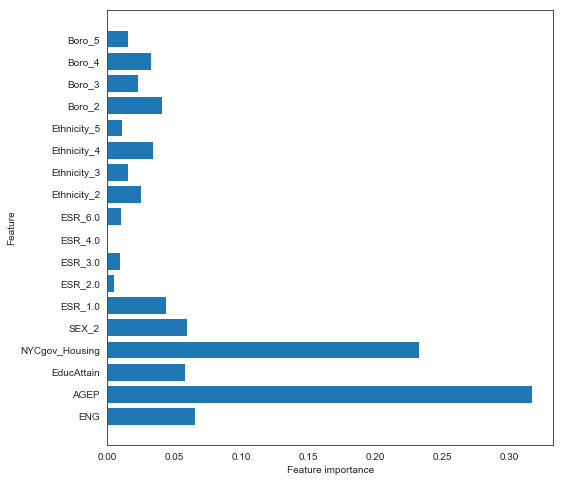

In [274]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

In [276]:
#model performance
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 1874  4077]
 [ 4436 23660]]
             precision    recall  f1-score   support

          0       0.30      0.31      0.31      5951
          1       0.85      0.84      0.85     28096

avg / total       0.76      0.75      0.75     34047



In [278]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 75.0%


In [283]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [285]:
#check accuracy
bagged_tree.score(X_train, y_train)

0.8191323758334068

In [287]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [289]:
#Now, let's check the training and testing accuracy of the model using its .score() method.
forest.score(X_train, y_train)

0.8191323758334068

In [290]:
forest.score(X_test, y_test)

0.8252122066555057

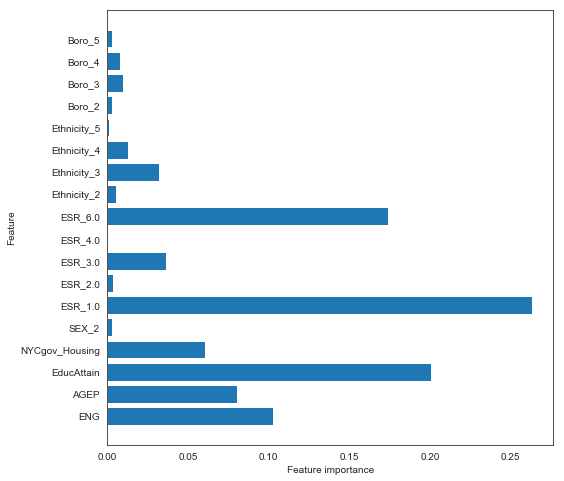

In [291]:
# checking feature importances
plot_feature_importances(forest)

In [292]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [220]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(feat, target, test_size=0.5, random_state=0)
print(target.value_counts()) #Previous original class distribution
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) # fitting ONLY on training data
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

1    55985
0    12109
Name: NYCgov_Pov_Stat, dtype: int64
1    28036
0    28036
dtype: int64


In [221]:
# Train the classifier using training data 
dtr = DecisionTreeClassifier(criterion='entropy')
dtr.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [222]:
# Make predictions using test set 
y_pred = dtr.predict(X_test)
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8439904086181619

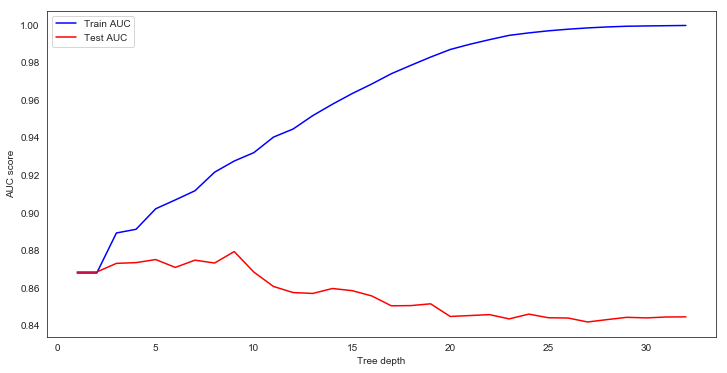

In [223]:
'''Maximum Tree Depth: Let's first check for the best depth parameter for our decision tree.
1 Create an array for for depth values ranging from 1 - 32.
2 In a loop, train the classifier for each depth value (32 runs)
3 Calculate the training and test AUC for each run
4 Plot a graph to show under/over fitting and optimal value
5 Interpret the results
'''
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

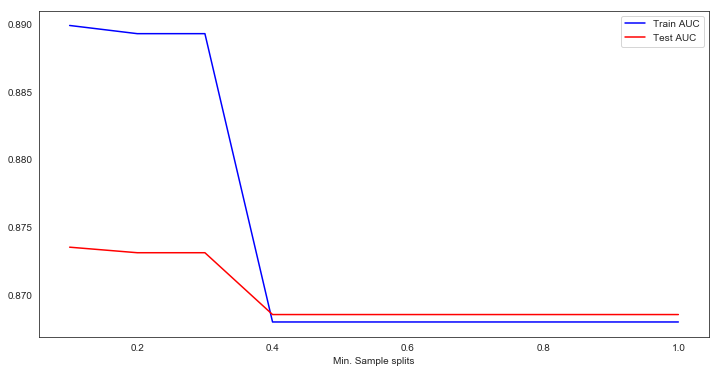

In [228]:
'''
Minimum Sample Split: Now check for the best min_samples_splits parameter for our decision tree.
Create an array for for min_sample_splits values ranging from 0.1 - 1 with an increment of 0.1
In a loop, train the classifier for each min_samples_splits value (10 runs)
Calculate the training and test AUC for each run
Plot a graph to show under/over fitting and optimal value
Interpret the results'''
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

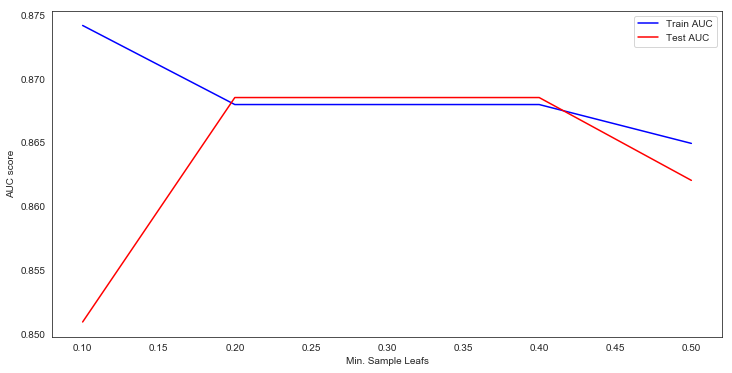

In [229]:
'''Minimum Sample Leafs: Now check for the best min_samples_leafs parameter value for our decision tree.
Create an array for for min_samples_leafs values ranging from 0.1 - 0.5 with an increment of 0.1
In a loop, train the classifier for each min_samples_leafs value (5 runs)
Calculate the training and test AUC for each run
Plot a graph to show under/over fitting and optimal value
Interpret the results'''
# Calculate the optimal value for minimum sample leafs

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

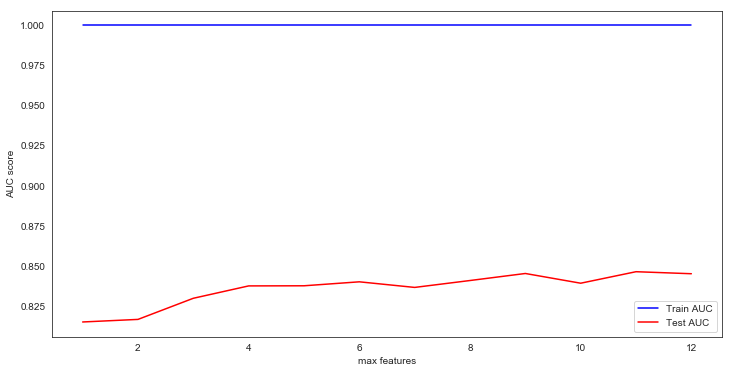

In [233]:
'''Maximum Features: Now check for the best max_features parameter value for our decision tree.
Create an array for for max_features values ranging from 1 - 12 (1 features vs all)
In a loop, train the classifier for each max_features value (12 runs)
Calculate the training and test AUC for each run
Plot a graph to show under/over fitting and optimal value
Interpret the results'''
# Find the best value for optimal maximum feature size
max_features = list(range(1,X_train_resampled.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show() 

In [237]:
'''Re-train the classifier with chosen values:
So now we shall use the best values from each training phase above and 
feed it back to our classifier and see if have any improvement in predictive performance.
Train the classifier with optimal values identified
compare the AUC with vanilla DT AUC
Interpret the results of comparison'''
# train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=9,
                           max_depth=2,
                           min_samples_split=0.4,
                           min_samples_leaf=0.25)
dt.fit(X_train_resampled, y_train_resampled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.845430517030968

In [ ]:
# You observations here 
# we moved from AUC 0.69 in the vanilla classifier to 0.73 some tuning. 
# Due to randomness, results may slightly differ, there is some improvement in most cases. 
# With more complicated datasets, we might see an even bigger improvement in AUC/accuracy of the classifier. 

In [42]:
chosen_catcols = ['CIT','SEX','ESR','DIS','Ethnicity','Boro']

In [43]:
data[chosen_catcols] = data[chosen_catcols].astype(np.str)

In [45]:
chosen_cols6 = ['TotalWorkHrs_PU', 'NYCgov_Income','NYCgov_Threshold','ENG', \
                'AGEP','CIT', 'SEX', 'ESR', 'DIS', 'Ethnicity', 'Boro', 
                'EducAttain', 'NYCgov_Housing', 'NYCgov_PovGapIndex']
len(chosen_cols6)

14

In [51]:
chosen_cols5 = ['TotalWorkHrs_PU', 'ENG','AGEP','CIT', 'SEX', 'ESR', 'DIS', 'Ethnicity', 'Boro', 
                'EducAttain', 'NYCgov_Housing']
len(chosen_cols5)

11

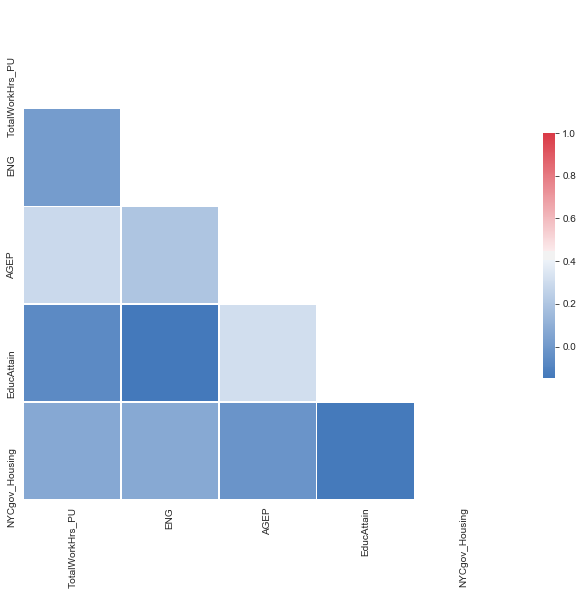

In [52]:
CorrMtx(data[chosen_cols5].corr(), dropDuplicates = True)

In [53]:
data[chosen_cols5].corr()

,TotalWorkHrs_PU,ENG,AGEP,EducAttain,NYCgov_Housing
TotalWorkHrs_PU,1.000000,0.016304,0.291417,-0.062570,0.074278
ENG,0.016304,1.000000,0.201106,-0.144823,0.075495
AGEP,0.291417,0.201106,1.000000,0.314695,-0.019116
EducAttain,-0.062570,-0.144823,0.314695,1.000000,-0.138275
NYCgov_Housing,0.074278,0.075495,-0.019116,-0.138275,1.000000


In [54]:
# normalize
data.loc[:, float_cols] = float_data.apply(lambda x: (x-x.min())/(x.max()-x.min()),axis=0)

In [55]:
data.loc[:, float_cols].sample(10)

,WAGP_adj,INTP_adj,SEMP_adj,SSP_adj,SSIP_adj,PA_adj,RETP_adj,OI_adj,MRGP_adj,RNTP_adj,...,NYCgov_MedPremiums,NYCgov_WIC,NYCgov_SNAP,NYCgov_SchoolLunch,NYCgov_SchoolBreakfast,NYCgov_Nutrition,NYCgov_FICAtax,NYCgov_IncomeTax,NYCgov_PovGap,NYCgov_PovGapIndex
2787,0.000000,0.004237,0.014152,0.408,0.0,0.0,0.0,0.261538,0.000000,0.000000,...,0.128265,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.021135,0.000000,0.000000
16996,0.141066,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.396825,0.000000,...,0.234772,0.0,0.000000,0.0,0.0,0.000000,0.071792,0.041968,0.000000,0.000000
24698,0.000000,0.004237,0.134085,0.000,0.0,0.0,0.0,0.000000,0.460317,0.000000,...,0.170331,0.0,0.000000,0.0,0.0,0.000000,0.108823,0.047296,0.000000,0.000000
44484,0.031348,0.004298,0.038139,0.220,0.0,0.0,0.0,0.000000,0.000000,0.394737,...,0.025601,0.0,0.000000,0.0,0.0,0.000000,0.026060,0.023741,0.000000,0.000000
52872,0.064263,0.004237,0.014152,0.240,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.127905,0.0,0.000000,0.0,0.0,0.000000,0.025158,0.028347,0.000000,0.000000
45801,0.125392,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.000000,0.289474,...,0.009123,0.0,0.000000,0.0,0.0,0.000000,0.049089,0.041835,0.000000,0.000000
15057,0.000000,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.000000,0.447368,...,0.122539,0.0,0.207361,0.0,0.0,0.183164,0.030940,0.016525,0.160323,0.275455
8632,0.000000,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.634921,0.000000,...,0.326444,0.0,0.000000,0.0,0.0,0.000000,0.184082,0.115368,0.000000,0.000000
34126,0.188088,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.000000,0.500000,...,0.013415,0.0,0.000000,0.0,0.0,0.000000,0.073633,0.057221,0.000000,0.000000
54901,0.070533,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.222222,0.000000,...,0.098121,0.0,0.000000,0.0,0.0,0.000000,0.067804,0.033867,0.000000,0.000000


In [48]:
X = StandardScaler().fit_transform(data[chosen_cols6])

In [56]:
X = pd.get_dummies(data[chosen_cols5], drop_first=True, dtype=float)
X.columns

Index(['TotalWorkHrs_PU', 'ENG', 'AGEP', 'EducAttain', 'NYCgov_Housing',
       'CIT_2', 'CIT_3', 'CIT_4', 'CIT_5', 'SEX_2', 'ESR_1.0', 'ESR_2.0',
       'ESR_3.0', 'ESR_4.0', 'ESR_6.0', 'DIS_2', 'Ethnicity_2', 'Ethnicity_3',
       'Ethnicity_4', 'Ethnicity_5', 'Boro_2', 'Boro_3', 'Boro_4', 'Boro_5'],
      dtype='object')

In [57]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

In [58]:
X_pca.shape

(68094, 2)

In [59]:
y = data['NYCgov_Pov_Stat']

X = sm.tools.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit() #transparams=False

Optimization terminated successfully.
         Current function value: 0.354466
         Iterations 7


In [60]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        NYCgov_Pov_Stat   No. Observations:                68094
Model:                          Logit   Df Residuals:                    68069
Method:                           MLE   Df Model:                           24
Date:                Thu, 19 Sep 2019   Pseudo R-squ.:                  0.2427
Time:                        12:07:19   Log-Likelihood:                -24137.
converged:                       True   LL-Null:                       -31874.
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5280      0.068     51.712      0.000       3.394       3.662
TotalWorkHrs_PU    -0.9745      0.011    -86.261      0.000      -0.997      -0.952
ENG                -0.2303      0.014    -16.750      0.000      -0.257      -0.203
AGEP                0.0309      0.001     38.538      0.000       0.029       0.032
EducAttain          0.2958      0.012     23.875      0.000       0.271       0.320
NYCgov_Housing      2.7238      0.107     25.563      0.000       2.515       2.933
CIT_2               0.1047      0.078      1.348      0.178      -0.047       0.257
CIT_3              -0.1102      0.097     -1.134      0.257      -0.301       0.080
CIT_4              -0.1388      0.036     -3.883      0.000      -0.209      -0.069
CIT_5              -0.4433      0.039    -11.305      0.000      -0.520      -0.366
SEX_2              -0.0313      0.023     -1.341      0.180      -0.077       0.014
ESR_1.0            -0.8919      0.049    -18.207      0.000      -0.988      -0.796
ESR_2.0            -0.9520      0.117     -8.105      0.000      -1.182      -0.722
ESR_3.0            -1.4566      0.067    -21.614      0.000      -1.589      -1.324
ESR_4.0            -2.0188      0.516     -3.914      0.000      -3.030      -1.008
ESR_6.0            -0.9726      0.049    -19.988      0.000      -1.068      -0.877
DIS_2               0.0574      0.036      1.597      0.110      -0.013       0.128
Ethnicity_2        -0.3514      0.035    -10.053      0.000      -0.420      -0.283
Ethnicity_3        -0.7162      0.038    -18.716      0.000      -0.791      -0.641
Ethnicity_4        -0.2055      0.036     -5.715      0.000      -0.276      -0.135
Ethnicity_5        -0.4972      0.069     -7.172      0.000      -0.633      -0.361
Boro_2              0.1469      0.035      4.170      0.000       0.078       0.216
Boro_3              0.4792      0.046     10.345      0.000       0.388       0.570
Boro_4              0.2151      0.037      5.887      0.000       0.143       0.287
Boro_5              0.2018      0.060      3.338      0.001       0.083       0.320
===================================================================================
"""

In [61]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
AUC for None: 0.8319365578823353
LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
AUC for Balanced: 0.8337058091532861
LogisticRegression(C=1000000000000.0, class_weight={1: 2, 0: 1}, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
AUC for 2 to 1: 0.8321660704758185
LogisticRegression(C=1000000000000.0, class_weight={1: 10, 

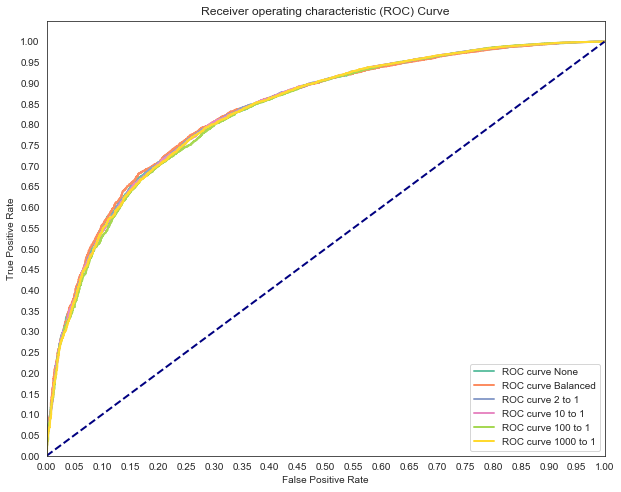

In [88]:
# Now let's compare a few different regularization performances on the dataset:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = 1e12, class_weight=weight,solver='lbfgs') #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [64]:
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds)))
    print("Recall Score: {}".format(recall_score(test, preds)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds)))
	
# Fitting and training the dummy
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

# Dummy predictions
dum_pred = dummy.predict(X_test)

#Printing out results
print_metrics(y_test, dum_pred)

Precision Score: 0.8227796052631579
Recall Score: 1.0
Accuracy Score: 0.8227796052631579
F1 Score: 0.9027746447101285


In [75]:
#run thru 25 iterations of k, record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    print(knn.score(X_test, y_test))
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

0.7888275375939849
0.745829417293233
0.8202537593984962
0.8067434210526315
0.8323543233082706
0.8290061090225563
0.8385220864661654
0.8361724624060151
0.8415765977443609
0.8401668233082706
0.8426339285714286
0.8417528195488722
0.8438087406015038
0.8432800751879699
0.8458059210526315
0.8448073308270677
0.8448660714285714
0.8459821428571429
0.8468045112781954
0.8474506578947368
0.8462171052631579
0.8462171052631579
0.8467457706766918
0.8463345864661654
0.8461583646616542


Text(0, 0.5, 'Testing Accuracy')

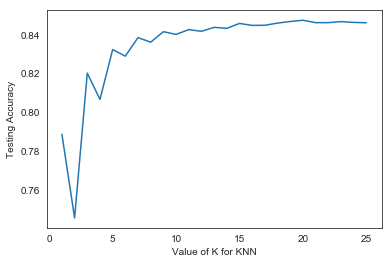

In [74]:
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [77]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [78]:
cnf_matrix

array([[  751,  2266],
       [  353, 13654]])

In [87]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.1,0.25, 0.33, 0.5,0.7,1]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, ratio in enumerate(ratios):
    #Fit a model
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    knn = KNeighborsClassifier(n_neighbors=k, p=1) #Starter code
    model_knn = knn.fit(X_train_resampled, y_train_resampled)
    print(model_log) #Preview model params

    #Predict
    y_pred = knn.predict(X_test)

    y_score = metrics.accuracy_score(y_test, y_pred)

    fpr, tpr, thresholds = roc_curve(y_pred, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positivex Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


TypeError: Singleton array 0.7601621240601504 cannot be considered a valid collection.

<Figure size 720x576 with 0 Axes>

In [79]:
print(y.value_counts()) #Previous original class distribution
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

1    55985
0    12109
Name: NYCgov_Pov_Stat, dtype: int64
1    41978
0    41978
dtype: int64


In [84]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.1,0.25, 0.33, 0.5,0.7,1]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, ratio in enumerate(ratios):
    #Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    logreg = LogisticRegression(fit_intercept = False, C = 1e12,solver ='lbfgs') #Starter code
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

TypeError: __init__() got an unexpected keyword argument 'sampling_strategy'

<Figure size 720x576 with 0 Axes>

In [89]:
#run thru 25 iterations of k, record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_resampled, y_train_resampled)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    print(k, knn.score(X_test, y_test))
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

1 0.7551104323308271
2 0.6907894736842105
3 0.7304981203007519
4 0.6862077067669173
5 0.7160479323308271
6 0.684562969924812
7 0.7110549812030075
8 0.6856790413533834
9 0.7091165413533834
10 0.6870888157894737
11 0.7065319548872181
12 0.6848566729323309
13 0.7061207706766918
14 0.6855028195488722
15 0.7044172932330827
16 0.6863251879699248
17 0.7033599624060151
18 0.689438439849624
19 0.703125
20 0.6888510338345865
21 0.7040061090225563
22 0.6912593984962406
23 0.7037711466165414
24 0.6914356203007519
25 0.7034187030075187


Text(0, 0.5, 'Testing Accuracy')

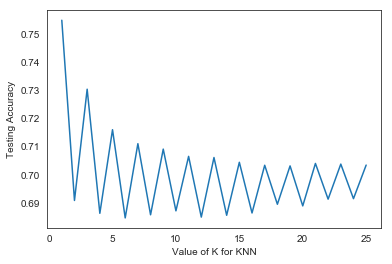

In [90]:
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [92]:
print_metrics(y_test, y_pred)

Precision Score: 0.9302593659942363
Recall Score: 0.6913686014135789
Accuracy Score: 0.7034187030075187
F1 Score: 0.7932178400294876


In [100]:
#try various n_neighbors
for i in range(2,26):
    knn_cv = KNeighborsClassifier(n_neighbors=20)
    cv_scores = cross_val_score(knn_cv, X, y, cv=i)
    print(cv_scores)

[0.84198778 0.84191976]
[0.84232786 0.84170411 0.84407631]
[0.84123348 0.84368208 0.84368208 0.84368208]
[0.84286658 0.84059035 0.8445554  0.84139805 0.84439712]
[0.84290749 0.84201251 0.84104326 0.84377478 0.8413076  0.84499471]
[0.84251645 0.84148849 0.84200247 0.84457237 0.84138569 0.83984375
 0.84649393]
[0.84459063 0.83916823 0.84269267 0.84234023 0.84480733 0.84314417
 0.84196922 0.84631653]
[0.84445619 0.84035946 0.84392758 0.84273821 0.8445678  0.8397885
 0.84309319 0.84613351 0.84679445]
[0.84508076 0.84317181 0.84214391 0.83803231 0.84096916 0.84711411
 0.84050521 0.84035835 0.84402996 0.84826675]
[0.8468745  0.8442901  0.84057503 0.84057503 0.84461315 0.84348247
 0.84216478 0.84491115 0.84248788 0.84440136 0.84779447]
[0.84760395 0.84370044 0.83823789 0.84599119 0.83753304 0.84138174
 0.84755023 0.83732816 0.84261544 0.84050053 0.84279168 0.8482552 ]
[0.84748998 0.84004581 0.84042756 0.8465356  0.84195457 0.83813705
 0.84459717 0.84514035 0.84284896 0.84132137 0.84552225 0.8

In [109]:
# create another knn model
knn2 = KNeighborsClassifier(p=1)

# create a duct if all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1,25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit moxel to data
knn_gscv.fit(X, y)
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

{'n_neighbors': 23}
0.843613240520457


In [110]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=0)
print(y.value_counts()) #Previous original class distribution
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) # fitting ONLY on training data
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

1    55985
0    12109
Name: NYCgov_Pov_Stat, dtype: int64
1    23610
0    23610
dtype: int64


In [111]:
#run thru 25 iterations of k, record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_resampled, y_train_resampled)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    print(k, knn.score(X_test, y_test))
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

1 0.747702589807853
2 0.6823308270676691
3 0.7180451127819549
4 0.6740810359231412
5 0.7059314954051796
6 0.6707393483709273
7 0.6997702589807853
8 0.6702172096908939
9 0.6958020050125313
10 0.6730367585630743
11 0.6931913116123642
12 0.6730367585630743
13 0.6923558897243107
14 0.674812030075188
15 0.6954887218045113
16 0.6779448621553885
17 0.6969507101086049
18 0.6787802840434419
19 0.6958020050125313
20 0.681077694235589
21 0.6942355889724311
22 0.681704260651629
23 0.6921470342522974
24 0.681077694235589
25 0.6905806182121972


Text(0, 0.5, 'Testing Accuracy')

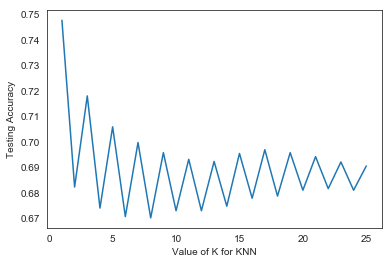

In [112]:
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [108]:
print_metrics(y_test, y_pred)

Precision Score: 0.9283711445322458
Recall Score: 0.6964336934697389
Accuracy Score: 0.7073151629072681
F1 Score: 0.7958481289265227


In [116]:
cnf_matrix2 = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cnf_matrix,'\n',cnf_matrix2)

[[  751  2266]
 [  353 13654]] 
 [[1259  408]
 [2555 5354]]


In [17]:
#Create a function to clean the dataframes from the different excel sheets

def my_cleaner(dataframe):
#select year 2014 and cohort 4 year August
    dataframe = dataframe[dataframe['Cohort Year'] == 2014]
    dataframe = dataframe[dataframe['Cohort'] == '4 year August']
#keep only 3 columns from the dataframes  
    cols = [col for col in dataframe.columns if col in ['DBN','Category','#']]
    dataframe = dataframe[cols]
#transform the categories into columns
    dataframe = dataframe.groupby(['DBN','Category'])['#'].aggregate('first').unstack()
#due to columns removal - reset the index
    dataframe = dataframe.reset_index()
    return dataframe

In [15]:
test = my_cleaner(data_ell)

In [16]:
test.sample(5)

Category,DBN,ELL,Former ELL,Not ELL
321,18K576,2.0,2.0,102.0
290,15K698,2.0,1.0,62.0
438,28Q896,1.0,2.0,71.0
220,11X418,4.0,5.0,92.0
41,02M422,NaN,6.0,73.0


In [18]:
dataframes_to_merge=[my_cleaner(df) for df in df_created]
len(dataframes_to_merge)

5

In [14]:
data_grad_2014 = data_grad_2014[['DBN','School Name','#','% of cohort']].reset_index()
data_grad_2014.head()

,index,DBN,School Name,#,% of cohort
0,0,01M292,Orchard Collegiate Academy,29,0.965517
1,51,01M448,University Neighborhood High School,88,0.931818
2,108,01M450,East Side Community School,92,0.967391
3,165,01M458,Forsyth Satellite Academy,73,0.369863
4,205,01M509,Marta Valle High School,42,0.642857


In [15]:
data_grad_2014 = data_grad_2014[['DBN','School Name','#','% of cohort']]
data_grad_2014.head()

,DBN,School Name,#,% of cohort
0,01M292,Orchard Collegiate Academy,29,0.965517
1,01M448,University Neighborhood High School,88,0.931818
2,01M450,East Side Community School,92,0.967391
3,01M458,Forsyth Satellite Academy,73,0.369863
4,01M509,Marta Valle High School,42,0.642857


In [19]:
dataset = data_grad_2014
for x in range(5):
    dataset = dataset.merge(dataframes_to_merge[x],on = 'DBN',how = 'inner')

In [20]:
len(dataset)

479

In [21]:
dataset = dataset.rename(columns={'#':'total_stud','% of cohort':'grad_rate'})

In [22]:
dataset.describe()

,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
count,479.000000,475.000000,388.000000,419.000000,479.000000,478.000000,469.000000,401.000000,471.000000,475.000000,242.000000,230.000000,405.000000,476.000000,468.000000,479.000000,474.000000
mean,150.513570,0.741041,16.092784,11.579952,127.348643,127.420502,23.857143,32.344140,41.050955,59.298947,4.049587,2.782609,24.701235,74.199580,78.583333,112.469729,38.445148
std,179.989735,0.229672,26.756663,18.817435,159.607015,161.375680,24.016173,86.267846,38.718591,58.126908,5.621316,4.330823,67.081760,88.841409,97.258940,126.245206,66.273651
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,79.000000,0.677836,3.000000,3.000000,63.000000,64.000000,12.000000,2.000000,18.000000,22.500000,1.000000,1.000000,2.000000,35.000000,38.000000,61.500000,10.000000
50%,99.000000,0.795082,6.000000,5.000000,86.000000,80.500000,19.000000,6.000000,30.000000,48.000000,2.000000,2.000000,4.000000,49.000000,50.000000,80.000000,18.000000
75%,126.000000,0.901220,16.000000,11.000000,114.000000,107.750000,26.000000,23.000000,50.500000,71.500000,4.000000,3.000000,18.000000,68.000000,69.000000,100.000000,34.750000
max,1322.000000,1.000000,184.000000,144.000000,1308.000000,1298.000000,170.000000,830.000000,276.000000,390.000000,39.000000,37.000000,808.000000,577.000000,800.000000,861.000000,645.000000


In [23]:
dataset[dataset['grad_rate'].isnull()]

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
264,14K322,FOUNDATIONS ACADEMY,1,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
291,16K393,FREDERICK DOUGLASS ACADEMY IV SECONDARY SCHOOL,1,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
323,18K589,ARTS & MEDIA PREPARATORY ACADEMY,4,NaN,NaN,NaN,4.0,4.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0,NaN
333,19K422,Spring Creek Community School,1,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN


In [24]:
#remove missing or incorrect value in grad_rate to keep only numeric
dataset=dataset[pd.to_numeric(dataset.grad_rate, errors='coerce').notnull()]

In [28]:
len(dataset)

475

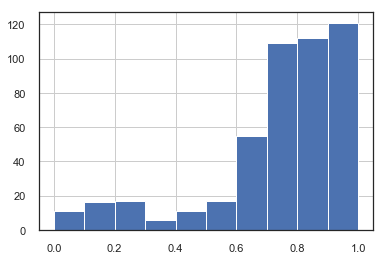

In [25]:
dataset.grad_rate.hist()

In [26]:
dataset.grad_rate.describe()

count    475.000000
mean       0.741041
std        0.229672
min        0.000000
25%        0.677836
50%        0.795082
75%        0.901220
max        1.000000
Name: grad_rate, dtype: float64

In [27]:
columns_tobe_changed = list(dataset.columns)[4:]
columns_tobe_changed

['ELL',
 'Former ELL',
 'Not ELL',
 'Not SWD',
 'SWD',
 'Asian',
 'Black',
 'Hispanic',
 'Multi-Racial',
 'Native American',
 'White',
 'Female',
 'Male',
 'Econ Disadv',
 'Not Econ Disadv']

In [28]:
new_cols = ['prob_'+x for x in columns_tobe_changed]
new_cols

['prob_ELL',
 'prob_Former ELL',
 'prob_Not ELL',
 'prob_Not SWD',
 'prob_SWD',
 'prob_Asian',
 'prob_Black',
 'prob_Hispanic',
 'prob_Multi-Racial',
 'prob_Native American',
 'prob_White',
 'prob_Female',
 'prob_Male',
 'prob_Econ Disadv',
 'prob_Not Econ Disadv']

In [29]:
# for each demographic category, create new columns with each attribute's % of total students
dataset[new_cols] = round(dataset[columns_tobe_changed].div(dataset.total_stud, axis=0),2)
dataset.head()

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv,prob_ELL,prob_Former ELL,prob_Not ELL,prob_Not SWD,prob_SWD,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,6.0,19.0,NaN,NaN,1.0,6.0,23.0,27.0,2.0,0.03,0.10,0.86,0.72,0.28,0.10,0.21,0.66,NaN,NaN,0.03,0.21,0.79,0.93,0.07
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,19.0,42.0,1.0,1.0,2.0,38.0,50.0,77.0,11.0,0.01,0.10,0.89,0.85,0.15,0.26,0.22,0.48,0.01,0.01,0.02,0.43,0.57,0.88,0.12
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,19.0,52.0,4.0,NaN,10.0,40.0,52.0,62.0,30.0,NaN,0.01,0.99,0.83,0.17,0.08,0.21,0.57,0.04,NaN,0.11,0.43,0.57,0.67,0.33
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,25.0,41.0,1.0,NaN,5.0,47.0,26.0,65.0,8.0,0.08,0.05,0.86,0.77,0.23,0.01,0.34,0.56,0.01,NaN,0.07,0.64,0.36,0.89,0.11
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,12.0,27.0,NaN,NaN,1.0,20.0,22.0,41.0,1.0,0.05,0.02,0.93,0.60,0.40,0.05,0.29,0.64,NaN,NaN,0.02,0.48,0.52,0.98,0.02


In [37]:
dataset.describe()

,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv,prob_ELL,prob_Former ELL,prob_Not ELL,prob_Not SWD,prob_SWD,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
count,475.000000,475.000000,388.000000,419.000000,475.000000,475.000000,468.000000,401.000000,467.000000,474.000000,242.000000,230.000000,405.000000,472.000000,467.000000,475.000000,474.000000,388.000000,419.000000,475.000000,475.000000,468.000000,401.000000,467.000000,474.000000,242.000000,230.000000,405.000000,472.000000,467.000000,475.000000,474.000000
mean,151.766316,0.741041,16.092784,11.579952,128.406316,128.212632,23.905983,32.344140,41.389722,59.421941,4.049587,2.782609,24.701235,74.817797,78.747323,113.402105,38.445148,0.119897,0.074916,0.836253,0.819853,0.182842,0.119352,0.350642,0.448165,0.025083,0.018565,0.100148,0.498602,0.513169,0.785916,0.214536
std,180.225826,0.229672,26.756663,18.817435,159.859673,161.575782,24.018545,86.267846,38.709800,58.126413,5.621316,4.330823,67.081760,88.962054,97.298446,126.364604,66.273651,0.158682,0.085757,0.208849,0.091447,0.089411,0.146856,0.245137,0.245225,0.022282,0.022932,0.134578,0.140571,0.130824,0.137550,0.137342
min,5.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.010000,0.400000,0.000000,0.010000,0.000000,0.030000,0.000000,0.000000,0.000000,0.060000,0.070000,0.210000,0.010000
25%,79.000000,0.677836,3.000000,3.000000,64.000000,65.000000,12.000000,2.000000,18.000000,23.000000,1.000000,1.000000,2.000000,35.000000,38.000000,62.000000,10.000000,0.030000,0.030000,0.810000,0.760000,0.130000,0.020000,0.170000,0.230000,0.010000,0.010000,0.020000,0.430000,0.440000,0.740000,0.120000
50%,100.000000,0.795082,6.000000,5.000000,86.000000,81.000000,19.000000,6.000000,30.000000,48.000000,2.000000,2.000000,4.000000,49.000000,50.000000,80.000000,18.000000,0.060000,0.050000,0.900000,0.820000,0.180000,0.060000,0.280000,0.460000,0.020000,0.010000,0.040000,0.490000,0.510000,0.810000,0.190000
75%,126.500000,0.901220,16.000000,11.000000,114.000000,108.000000,26.000000,23.000000,51.000000,71.750000,4.000000,3.000000,18.000000,68.500000,69.000000,100.000000,34.750000,0.130000,0.090000,0.960000,0.880000,0.240000,0.150000,0.470000,0.640000,0.030000,0.020000,0.120000,0.570000,0.580000,0.880000,0.260000
max,1322.000000,1.000000,184.000000,144.000000,1308.000000,1298.000000,170.000000,830.000000,276.000000,390.000000,39.000000,37.000000,808.000000,577.000000,800.000000,861.000000,645.000000,0.850000,0.600000,1.000000,1.000000,0.600000,0.880000,0.960000,1.000000,0.200000,0.280000,0.790000,1.000000,1.000000,1.000000,0.790000


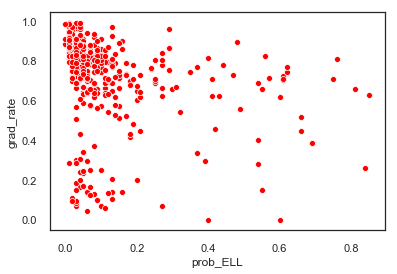

In [38]:
sns.scatterplot(dataset['prob_ELL'], dataset.grad_rate, color = 'red')

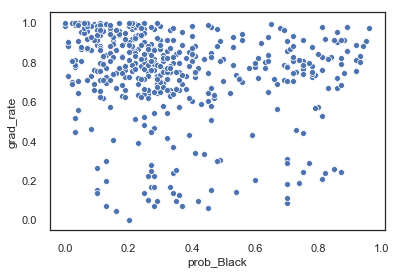

In [39]:
sns.scatterplot(dataset['prob_Black'], dataset.grad_rate)

In [40]:
new_cols

['prob_ELL',
 'prob_Former ELL',
 'prob_Not ELL',
 'prob_Not SWD',
 'prob_SWD',
 'prob_Asian',
 'prob_Black',
 'prob_Hispanic',
 'prob_Multi-Racial',
 'prob_Native American',
 'prob_White',
 'prob_Female',
 'prob_Male',
 'prob_Econ Disadv',
 'prob_Not Econ Disadv']

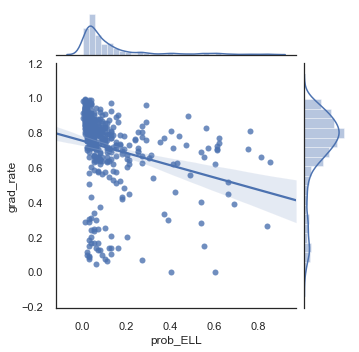

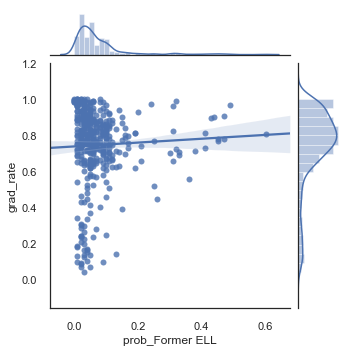

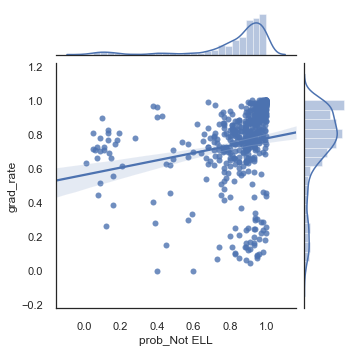

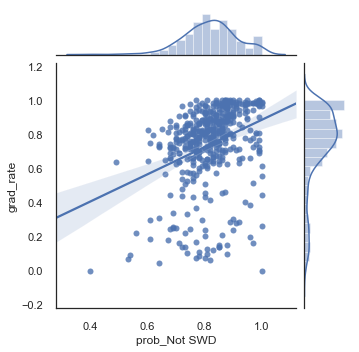

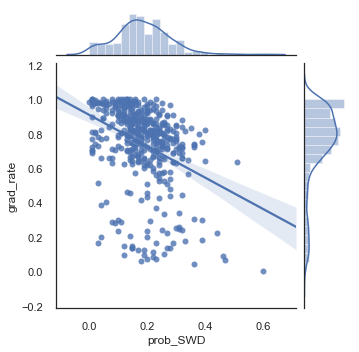

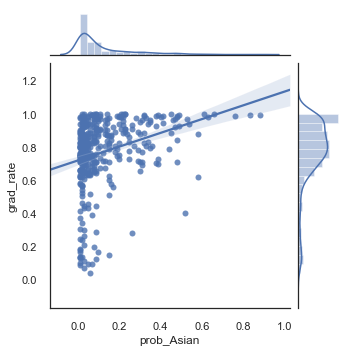

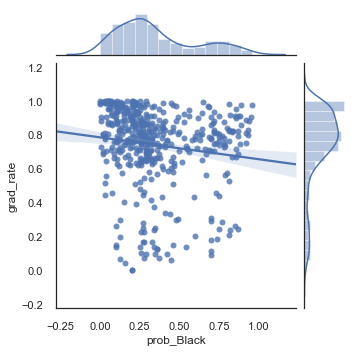

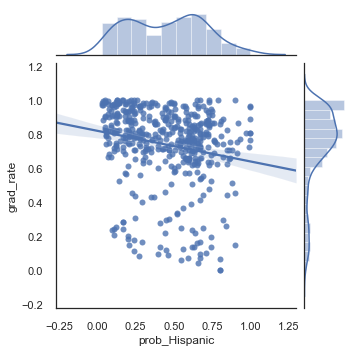

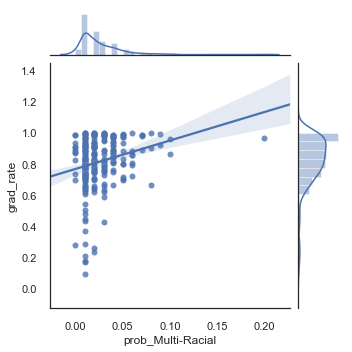

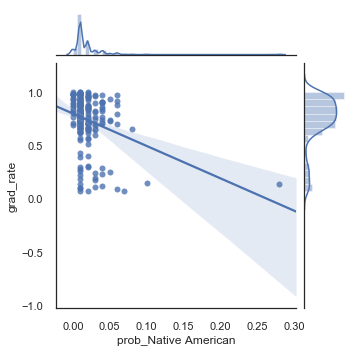

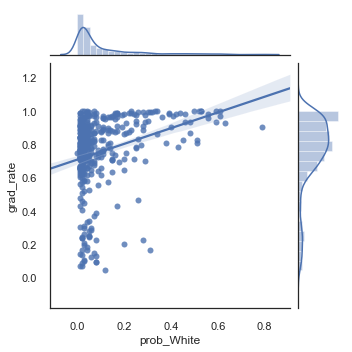

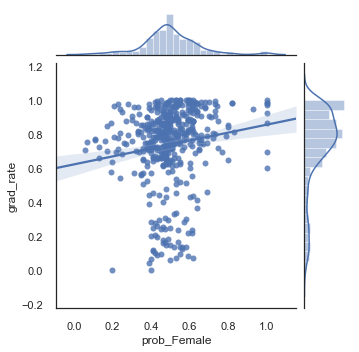

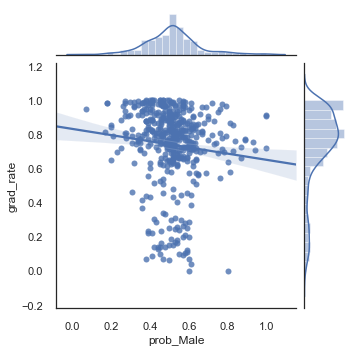

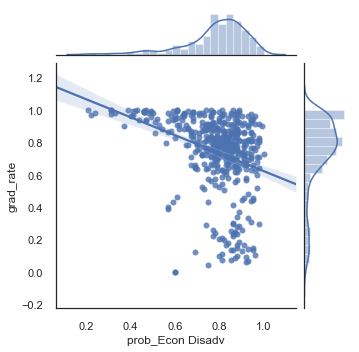

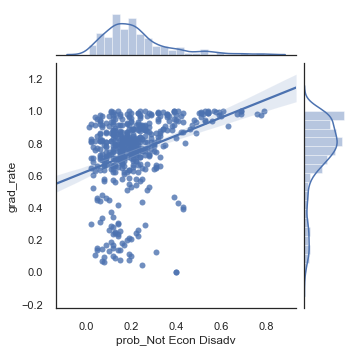

In [30]:
for col in new_cols:
    sns.jointplot(x=col, y='grad_rate', data=dataset, kind="reg",height=5)

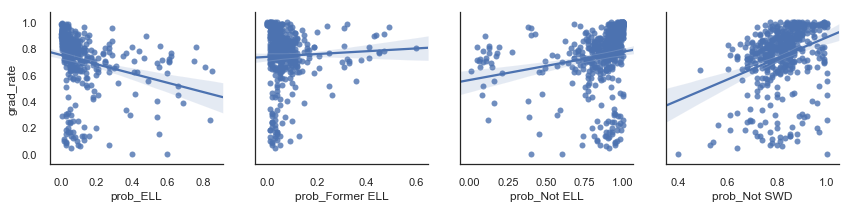

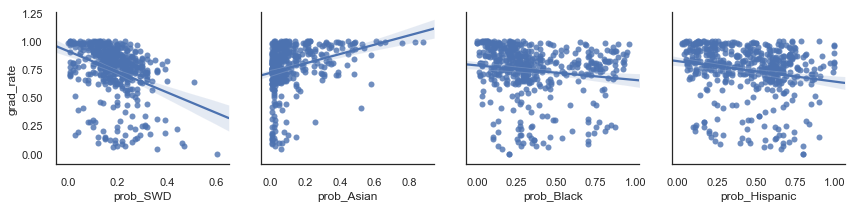

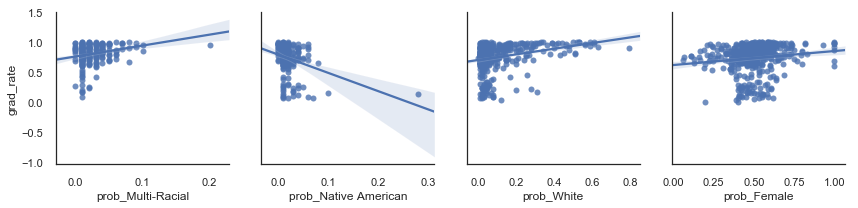

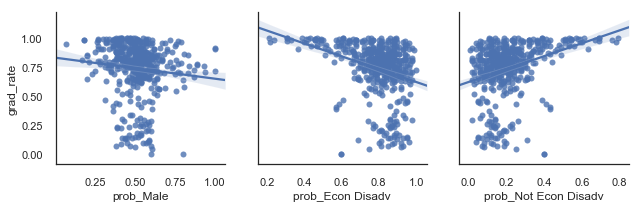

In [42]:
n = 4
row_groups= [new_cols[i:i+n] for i in range(0, len(new_cols), n) ]
for i in row_groups:
    pp = sns.pairplot(data=dataset, y_vars=['grad_rate'],x_vars=i, kind="reg", height=3)

In [67]:
dataset.to_csv("dataset.csv")

In [43]:
# two rows have grad rate of 0%.  Removing them
dataset[dataset['grad_rate'] == 0]

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv,prob_ELL,prob_Former ELL,prob_Not ELL,prob_Not SWD,prob_SWD,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
130,07X520,FOREIGN LANGUAGE ACADEMY OF GLOBAL STUDIES,5,0.0,3.0,NaN,2.0,5.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN,1.0,4.0,3.0,2.0,0.6,NaN,0.4,1.0,NaN,NaN,0.2,0.8,NaN,NaN,NaN,0.2,0.8,0.6,0.4
167,09X276,LEADERSHIP INSTITUTE,5,0.0,2.0,NaN,3.0,2.0,3.0,NaN,1.0,4.0,NaN,NaN,NaN,2.0,3.0,3.0,2.0,0.4,NaN,0.6,0.4,0.6,NaN,0.2,0.8,NaN,NaN,NaN,0.4,0.6,0.6,0.4


In [44]:
d = dataset[dataset['grad_rate'] > 0]
len(dataset)-len(d)

2

In [58]:
d.grad_rate.describe()

count    473.000000
mean       0.744174
std        0.225025
min        0.041667
25%        0.684783
50%        0.795620
75%        0.902439
max        1.000000
Name: grad_rate, dtype: float64

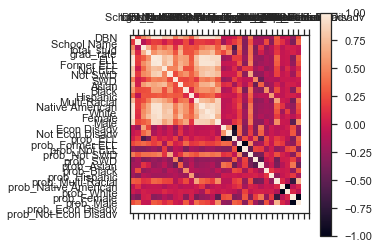

In [59]:
plt.matshow(d.corr())
plt.xticks(range(len(d.columns)), d.columns)
plt.yticks(range(len(d.columns)), d.columns)
plt.colorbar()
plt.show()

In [45]:
d.columns

Index(['DBN', 'School Name', 'total_stud', 'grad_rate', 'ELL', 'Former ELL',
       'Not ELL', 'Not SWD', 'SWD', 'Asian', 'Black', 'Hispanic',
       'Multi-Racial', 'Native American', 'White', 'Female', 'Male',
       'Econ Disadv', 'Not Econ Disadv', 'prob_ELL', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic', 'prob_Multi-Racial', 'prob_Native American',
       'prob_White', 'prob_Female', 'prob_Male', 'prob_Econ Disadv',
       'prob_Not Econ Disadv'],
      dtype='object')

In [46]:
filtered_cols_d = [
'total_stud', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic',
       'prob_White', 'prob_Female', 'prob_Male'
]

In [47]:
#Replace missing value with 0
d = d.fillna(0)

features_model = sm.OLS(endog=d['grad_rate'], exog=sm.add_constant(d[filtered_cols_d]) ).fit()
features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     18.54
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.22e-28
Time:                        13:10:19   Log-Likelihood:                 114.65
No. Observations:                 473   AIC:                            -207.3
Df Residuals:                     462   BIC:                            -161.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.6419     19.258     -0.241      0.810     -42.486      33.202
total_stud      -3.693e-05   5.76e-05     -0.641      0.522      -0.000    7.63e-05
prob_Former ELL     1.1508      0.182      6.341      0.000       0.794       1.508
prob_Not ELL        0.6917      0.079      8.799      0.000       0.537       0.846
prob_Not SWD        0.7459      0.127      5.895      0.000       0.497       0.995
prob_Asian          0.4426      0.362      1.221      0.223      -0.269       1.155
prob_Black          0.2254      0.343      0.657      0.511      -0.448       0.899
prob_Hispanic       0.3062      0.342      0.894      0.372      -0.367       0.979
prob_White          0.4790      0.348      1.378      0.169      -0.204       1.162
prob_Female         3.8280     19.253      0.199      0.842     -34.007      41.663
prob_Male           3.8199     19.255      0.198      0.843     -34.018      41.658
==============================================================================
Omnibus:                      164.892   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.680
Skew:                          -1.744   Prob(JB):                     4.08e-95
Kurtosis:                       6.144   Cond. No.                     8.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# for col in filtered_cols:
#     sns.jointplot(x=col, y='grad_log', data=dataset, kind="reg",height=5)

In [48]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

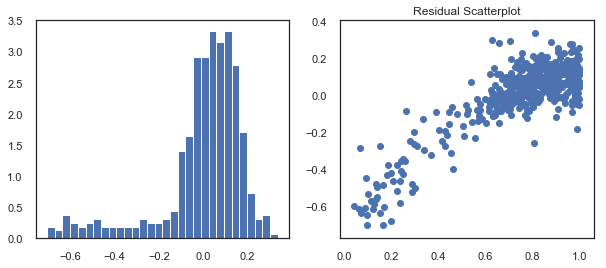

In [49]:
# same as above, except removed the two zeros
checkresiduals(d, 'grad_rate', features_model)

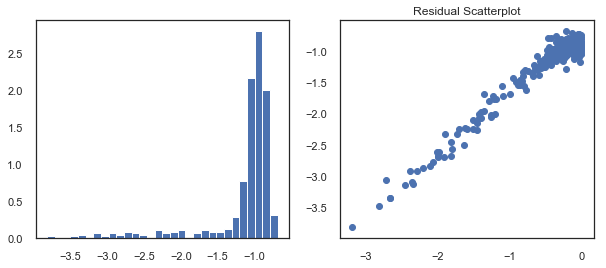

In [50]:
d['grad_log'] = np.log(d['grad_rate'])
checkresiduals(d, 'grad_log', features_model)

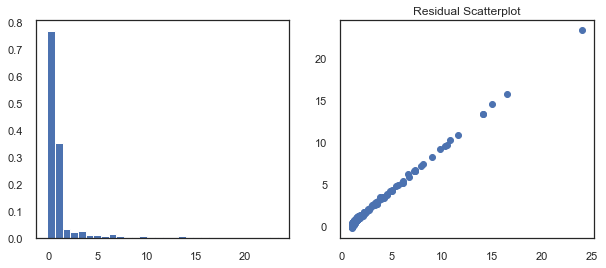

In [51]:
d['grad_recipr'] = 1/d['grad_rate']
checkresiduals(d, 'grad_recipr', features_model)

In [52]:
achievement = pd.read_csv('Data/Student_Achievement.csv', skiprows = 1)
achievement = achievement.rename(columns={'Metric Value - Graduation Rate, 4 year':'gradrate'})

In [53]:
# merge d (which is just the original dataset minus the 2 zero grad_rates)
# with student achievement tab in HS Quality Reports file
newset = d.merge(achievement,on = 'DBN',how = 'inner')

In [54]:
newset = newset.rename(columns={'Student Achievement - Section Score':'SA_score'})

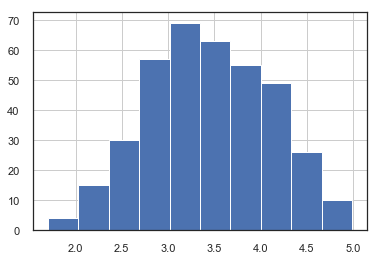

In [55]:
# attempted running model using Student Achievement as target variable instead of grad_rate- too many interactions
newset.SA_score.hist()

In [56]:
newset = newset.drop(['Former ELL', 'Not SWD', 'Asian', 'Hispanic', 'Native American', 'Female'], axis=1)

In [57]:
newset = newset.drop(['prob_ELL', 'prob_SWD', 'prob_Multi-Racial'], axis=1)

In [58]:
merged_set = newset[['DBN',
'School Name_x',
'total_stud',
'grad_rate',
'prob_Former ELL',
'prob_Not ELL',
'prob_Not SWD',
'prob_Asian',
'prob_Black',
'prob_Hispanic',
'prob_Native American',
'prob_White',
'prob_Female',
'prob_Male',
'prob_Econ Disadv',
'prob_Not Econ Disadv',
'SA_score',
'Metric Score - Percentage Earning 10+ Credits in First Year',
'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in First Year',
'Metric Score - Percentage Earning 10+ Credits in Second Year',
'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Second Year',
'Metric Score - Percentage Earning 10+ Credits in Third Year',
'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Third Year',
'Metric Score - Average Completion Rate for Remaining Regents',
'Metric Score - Weighted Regents Pass Rate, English',
'Metric Score - Weighted Regents Pass Rate, Math',
'Metric Score - Weighted Regents Pass Rate, Science'
,'Metric Score - Weighted Regents Pass Rate, Global History'
,'Metric Score - Weighted Regents Pass Rate, US History'
,'Metric Score - Graduation Rate, 4 year'
,'Metric Score - Graduation Rate, 6 year'
,'Metric Score - Weighted Diploma Rate, 4 year'
,'Metric Score - Weighted Diploma Rate, 6 year'
,'Metric Score - College and Career Preparatory Course Index'
,'Metric Score - Four-year College Readiness Inxdex'
,'Metric Score - College Readiness Rate including persistence'
,'Metric Score - Postsecondary Enrollment Rate, 6 months After High School'
,'Metric Score - Postsecondary Enrollment Rate, 18 months After High School'
,'Metric Value - Non-Dropout Rate, 4 year'
,'Metric Value - Non-Dropout Rate, 6 year'
]]

In [59]:
print(d.shape, newset.shape, merged_set.shape)

(473, 36) (420, 136) (420, 40)


In [61]:
merged_set.isna().sum()

DBN                                                                                   0
School Name_x                                                                         0
total_stud                                                                            0
grad_rate                                                                             0
prob_Former ELL                                                                       0
prob_Not ELL                                                                          0
prob_Not SWD                                                                          0
prob_Asian                                                                            0
prob_Black                                                                            0
prob_Hispanic                                                                         0
prob_Native American                                                                  0
prob_White                      

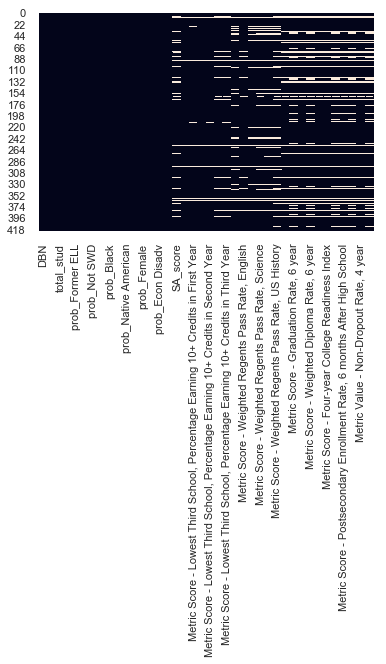

In [62]:
#Checking missing data
sns.heatmap(merged_set.isnull(), cbar=False)

In [63]:
#Replace missing value with 0
merged_set = merged_set.fillna(0)

In [64]:
filtered_cols_m = [
'prob_Former ELL',
'prob_Not ELL',
'prob_Not SWD',
'prob_Asian',
'prob_Black',
'prob_Hispanic',
'prob_White',
'Metric Score - Weighted Regents Pass Rate, Science'
,'Metric Score - Weighted Regents Pass Rate, US History'
,'Metric Score - Four-year College Readiness Index'
]

In [65]:
merged_set[filtered_cols_m].dtypes

prob_Former ELL                                          float64
prob_Not ELL                                             float64
prob_Not SWD                                             float64
prob_Asian                                               float64
prob_Black                                               float64
prob_Hispanic                                            float64
prob_White                                               float64
Metric Score - Weighted Regents Pass Rate, Science       float64
Metric Score - Weighted Regents Pass Rate, US History    float64
Metric Score - Four-year College Readiness Index         float64
dtype: object

In [66]:
features_model = sm.OLS(endog=merged_set['grad_rate'], exog=sm.add_constant(merged_set[filtered_cols_m]) ).fit()

features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     42.27
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.81e-57
Time:                        13:14:48   Log-Likelihood:                 378.78
No. Observations:                 420   AIC:                            -735.6
Df Residuals:                     409   BIC:                            -691.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.4929      0.232     -2.122      0.034      -0.949      -0.036
prob_Former ELL                                           0.7459      0.106      7.015      0.000       0.537       0.955
prob_Not ELL                                              0.6080      0.049     12.523      0.000       0.513       0.703
prob_Not SWD                                              0.7286      0.073      9.914      0.000       0.584       0.873
prob_Asian                                                0.0891      0.220      0.405      0.686      -0.344       0.522
prob_Black                                                0.0518      0.211      0.245      0.806      -0.363       0.467
prob_Hispanic                                             0.1228      0.210      0.584      0.560      -0.291       0.536
prob_White                                                0.2141      0.212      1.011      0.313      -0.202       0.630
Metric Score - Weighted Regents Pass Rate, Science        0.0033      0.006      0.570      0.569      -0.008       0.015
Metric Score - Weighted Regents Pass Rate, US History     0.0004      0.005      0.074      0.941      -0.010       0.010
Metric Score - Four-year College Readiness Index          0.0076      0.004      2.032      0.043       0.000       0.015
==============================================================================
Omnibus:                       78.425   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.702
Skew:                          -0.929   Prob(JB):                     1.43e-42
Kurtosis:                       5.750   Cond. No.                         561.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

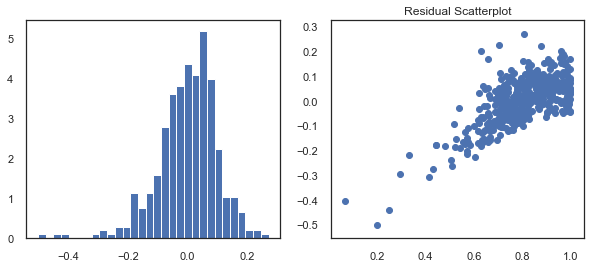

In [67]:
checkresiduals(merged_set, 'grad_rate', features_model)

In [68]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)

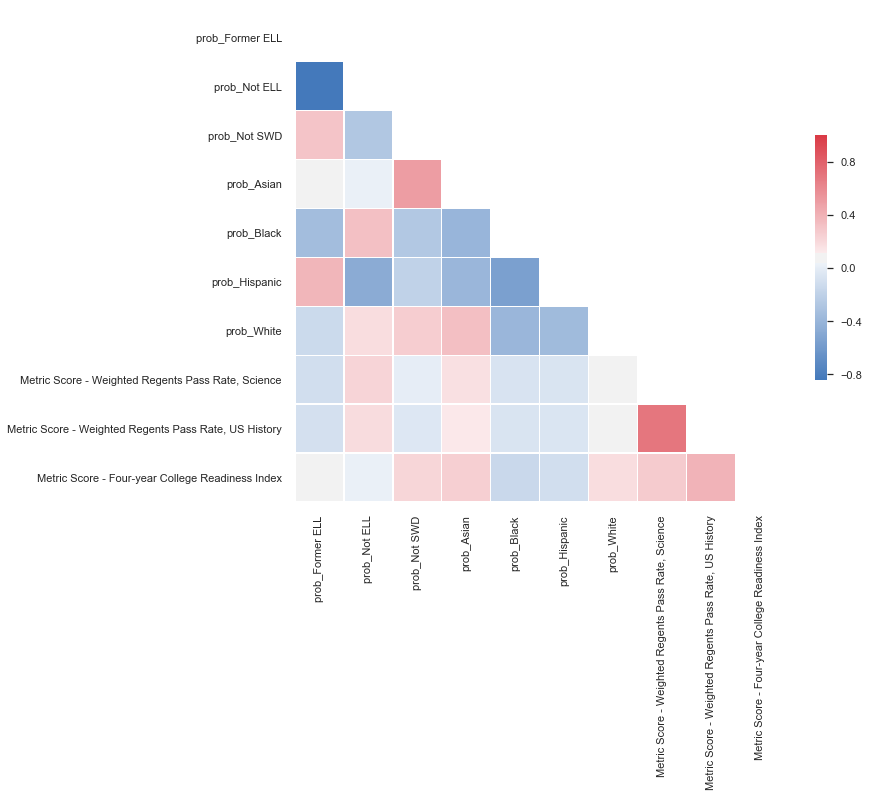

In [69]:
CorrMtx(merged_set[filtered_cols_m].corr(), dropDuplicates = True)

In [74]:
# add Student Quality Review table
sqr = pd.read_csv('Data/SQR_Summary2.csv', skiprows = 1)

In [71]:
# filter columns
sqr = sqr[['DBN', 'Enrollment',
'Rigorous Instruction - Percent Positive',
'Collaborative Teachers - Percent Positive',
'Supportive Environment - Percent Positive',
'Effective School Leadership - Percent Positive',
'Strong Family-Community Ties - Percent Positive',
'Trust - Percent Positive',
'Average Grade 8 English Proficiency',
'Average Grade 8 Math Proficiency', 'Percent English Language Learners',
'Percent Students with Disabilities', 'Percent Self-Contained',
'Economic Need Index', 'Percent in Temp Housing - 4yr',
'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
'Percent Hispanic', 'Percent White',
'Years of principal experience at this school',
'Percent of teachers with 3 or more years of experience',
'Student Attendance Rate', 'Percent of Students Chronically Absent',
'Teacher Attendance Rate']]

In [76]:
len(sqr.columns)

40

In [ ]:
# dataset = dataset.rename(columns={'#':'total_stud','% of cohort':'grad_rate'})

In [77]:
rir_dummies = pd.get_dummies(sqr['Rigorous Instruction Rating'], 'rir', drop_first=True)
ctr_dummies = pd.get_dummies(sqr['Collaborative Teachers Rating'], 'ctr', drop_first=True)
ser_dummies = pd.get_dummies(sqr['Supportive Environment Rating'], 'ser', drop_first=True)
eslr_dummies = pd.get_dummies(sqr['Effective School Leadership Rating'], 'eslr', drop_first=True)
famr_dummies = pd.get_dummies(sqr['Strong Family-Community Ties Rating'], 'famr', drop_first=True)
trustr_dummies = pd.get_dummies(sqr['Trust Rating'], 'trustr', drop_first=True)
sar_dummies = pd.get_dummies(sqr['Student Achievement Rating'], 'sar', drop_first=True)

In [78]:
sqr = pd.concat([sqr, rir_dummies, ctr_dummies, ser_dummies, eslr_dummies, famr_dummies, trustr_dummies, sar_dummies], axis=1)
len(sqr.columns)

61

In [79]:
sqr = sqr.drop(['Rigorous Instruction Rating', 'Collaborative Teachers Rating',
       'Supportive Environment Rating', 'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating'], axis = 1)

In [80]:
len(sqr.columns)

54

In [81]:
print(merged_set.shape, sqr.shape)

(420, 40) (491, 54)


In [82]:
# merge merged_set with sqr (third table)
bigset = merged_set.merge(sqr,on = 'DBN',how = 'inner')

In [83]:
bigset.shape

(420, 93)

In [85]:
#Replace missing value with 0
bigset = bigset.fillna(0)

In [89]:
bigset = bigset.drop(['Enrollment','Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent White',], axis = 1)

In [103]:
bigset.loc[bigset['Metric Value - Non-Dropout Rate, 4 year'] == 0, 'Metric Value - Non-Dropout Rate, 4 year'] = '0%'
# df.loc[df.A==0, 'B'] = df.loc[df.A==0, 'B'] / 2

In [107]:
for i in bigset['Metric Value - Non-Dropout Rate, 4 year']:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [127]:
bigset['Metric Value - Non-Dropout Rate, 4 year'] = bigset['Metric Value - Non-Dropout Rate, 4 year'].str.replace('[^\d.]', '').astype(float)
# df.code.str.replace('[^\d.]', '').astype(float)

In [131]:
bigset.loc[bigset['Metric Value - Non-Dropout Rate, 6 year'] == 0, 'Metric Value - Non-Dropout Rate, 6 year'] = '0%'

In [142]:
df.state_bottle_retail.apply(lambda x: x.replace('$','')
# bigset[bigset['Metric Value - Non-Dropout Rate, 4 year']].replace('[\%,]', '', regex=True).astype(float)
# bigset['Metric Value - Non-Dropout Rate, 4 year'].astype(float)
bigset['Metric Value - Non-Dropout Rate, 4 year'] = [x.replace('%','') for x in bigset['Metric Value - Non-Dropout Rate, 4 year'] if '%' in x].astype(np.float)

TypeError: argument of type 'int' is not iterable

In [62]:
filtered_cols_b = [
'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Trust - Percent Positive', 'Average Grade 8 English Proficiency',
       'Average Grade 8 Math Proficiency', 'Percent English Language Learners',
'Percent in Temp Housing - 4yr',
       'Student Attendance Rate',
       'Teacher Attendance Rate'
]

In [63]:
bigset[filtered_cols_b].dtypes

prob_Former ELL                                                float64
prob_Not ELL                                                   float64
prob_Not SWD                                                   float64
SA_score                                                       float64
Metric Score - Percentage Earning 10+ Credits in First Year    float64
Collaborative Teachers - Percent Positive                      float64
Supportive Environment - Percent Positive                      float64
Trust - Percent Positive                                       float64
Average Grade 8 English Proficiency                            float64
Average Grade 8 Math Proficiency                               float64
Percent English Language Learners                              float64
Percent in Temp Housing - 4yr                                  float64
Student Attendance Rate                                        float64
Teacher Attendance Rate                                        float64
dtype:

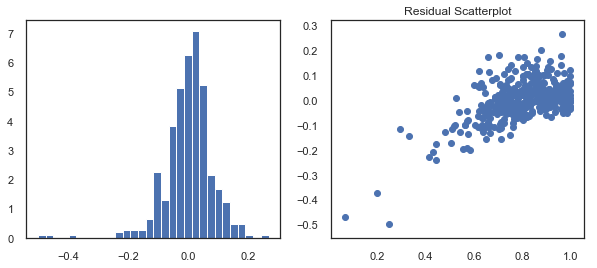

In [65]:
checkresiduals(bigset, 'grad_rate', features_model)

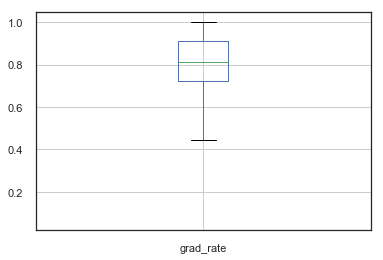

In [66]:
bigset.boxplot(['grad_rate'])

In [67]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(bigset[filtered_cols_b])
poly_columns = poly.get_feature_names(bigset[filtered_cols_b].columns)
poly_features = pd.DataFrame(poly_data, columns=poly_columns, index=bigset.index)
# scaler.fit(poly_features)
# scaled_features = scaler.transform(poly_features)

poly_scaled_features = pd.DataFrame(poly_features, columns=poly_columns, index=bigset.index)

In [68]:
poly_scaled_features.columns

Index(['1', 'prob_Former ELL', 'prob_Not ELL', 'prob_Not SWD', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive', 'Trust - Percent Positive',
       'Average Grade 8 English Proficiency',
       ...
       'Percent English Language Learners^2',
       'Percent English Language Learners Percent in Temp Housing - 4yr',
       'Percent English Language Learners Student Attendance Rate',
       'Percent English Language Learners Teacher Attendance Rate',
       'Percent in Temp Housing - 4yr^2',
       'Percent in Temp Housing - 4yr Student Attendance Rate',
       'Percent in Temp Housing - 4yr Teacher Attendance Rate',
       'Student Attendance Rate^2',
       'Student Attendance Rate Teacher Attendance Rate',
       'Teacher Attendance Rate^2'],
      dtype='object', length=120)

In [69]:
poly_scaled_features = poly_scaled_features.drop(['1'], axis=1)

In [70]:
poly_scaled_features_model = sm.OLS(endog=merged_set['grad_rate'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     10.53
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           9.94e-61
Time:                        13:02:44   Log-Likelihood:                 575.06
No. Observations:                 420   AIC:                            -910.1
Df Residuals:                     300   BIC:                            -425.3
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================================
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                   -24.3716     12.905     -1.889      0.060     -49.767       1.024
prob_Former ELL                                                                                          24.7832     15.134      1.638      0.103      -4.999      54.565
prob_Not ELL                                                                                             12.1531      9.897      1.228      0.220      -7.324      31.630
prob_Not SWD                                                                                              5.4702      8.249      0.663      0.508     -10.763      21.704
SA_score                                                                                                  0.1242      0.461      0.270      0.788      -0.782       1.031
Metric Score - Percentage Earning 10+ Credits in First Year                                              -0.3750      0.416     -0.901      0.368      -1.194       0.444
Collaborative Teachers - Percent Positive                                                                -1.4453     12.017     -0.120      0.904     -25.094      22.204
Supportive Environment - Percent Positive                                                                -4.8539     13.082     -0.371      0.711     -30.599      20.891
Trust - Percent Positive                                                                                 16.7919     20.895      0.804      0.422     -24.328      57.912
Average Grade 8 English Proficiency                                                                       1.4721      5.711      0.258      0.797      -9.768      12.712
Average Grade 8 Math Proficiency                                                                         -1.5407      4.666     -0.330      0.742     -10.724       7.642
Percent English Language Learners                                                                         0.8190     11.384      0.072      0.943     -21.583      23.221
Percent in Temp Housing - 4yr                                                                            14.9552     14.768      1.013      0.312     -14.107      44.018
Student Attendance Rate                                                                                   7.0614     12.483      0.566      0.572     -17.503      31.626
Teacher Attendance Rate                                                                                  16.3163     13.890      1.175      0.241     -11.017      43.650
prob_Former ELL^2      

In [150]:
trimmedset = bigset[bigset['grad_rate'] >= .5]

In [181]:
# 'prob_Not SWD', 'Trust - Percent Positive', 'Collaborative Teachers - Percent Positive',
filtered_cols_tt = [
'prob_Former ELL',
       'prob_Not ELL', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Supportive Environment - Percent Positive',
       'Average Grade 8 English Proficiency', 'Percent English Language Learners',
'Percent in Temp Housing - 4yr',
       'Student Attendance Rate',
       'Teacher Attendance Rate'
]

In [182]:
features_model = sm.OLS(endog=trimmedset['grad_rate'], exog=sm.add_constant(trimmedset[filtered_cols_tt]) ).fit()

features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     91.10
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           1.63e-96
Time:                        11:15:31   Log-Likelihood:                 534.07
No. Observations:                 410   AIC:                            -1046.
Df Residuals:                     399   BIC:                            -1002.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -0.8649      0.108     -7.978      0.000      -1.078      -0.652
prob_Former ELL                                                 0.2975      0.077      3.871      0.000       0.146       0.449
prob_Not ELL                                                    0.5254      0.078      6.778      0.000       0.373       0.678
SA_score                                                        0.0086      0.003      2.728      0.007       0.002       0.015
Metric Score - Percentage Earning 10+ Credits in First Year     0.0180      0.003      5.258      0.000       0.011       0.025
Supportive Environment - Percent Positive                       0.2235      0.078      2.860      0.004       0.070       0.377
Average Grade 8 English Proficiency                             0.0469      0.015      3.174      0.002       0.018       0.076
Percent English Language Learners                               0.4109      0.080      5.105      0.000       0.253       0.569
Percent in Temp Housing - 4yr                                  -0.3683      0.097     -3.810      0.000      -0.558      -0.178
Student Attendance Rate                                         0.6355      0.100      6.339      0.000       0.438       0.833
Teacher Attendance Rate                                         0.2678      0.068      3.931      0.000       0.134       0.402
==============================================================================
Omnibus:                        7.113   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                8.080
Skew:                          -0.208   Prob(JB):                       0.0176
Kurtosis:                       3.548   Cond. No.                         235.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

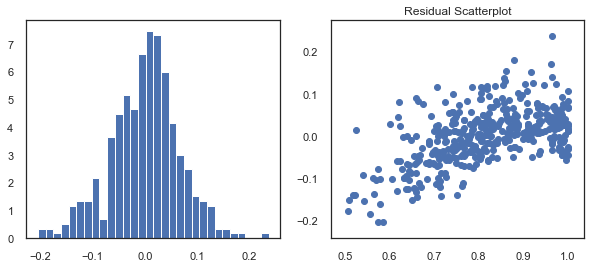

In [183]:
checkresiduals(trimmedset,'grad_rate', features_model)

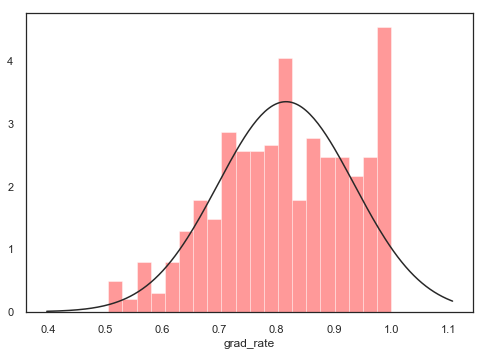

In [155]:
sns.distplot(trimmedset['grad_rate'], fit=norm, bins=20, kde=False, color = 'red')